In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

In [2]:
base = pd.read_csv('../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
Scores = []
Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5


for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    Scores.append(Ridge_A_Score)
    Ridge_Alphas.append(ridgecv.alpha_)

In [5]:
Positive = []
Negative = []

for i in Scores:
    if i < 0:
        Negative.append(i)
    else:
        Positive.append(i)

Median R2 is: 0.9096369955465444
Mean R2 is: 0.8971492936131866
Standard Deviation R2 is: 0.028784803462635712


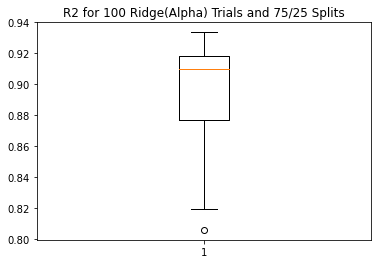

In [6]:
plt.boxplot(Positive)
plt.title('R2 for 100 Ridge(Alpha) Trials and 75/25 Splits')
print("Median R2 is: " + str(statistics.median(Positive)))
print("Mean R2 is: " + str(statistics.mean(Positive)))
print("Standard Deviation R2 is: " + str(statistics.stdev(Positive)))

Median Alpha is: 50.0
Mean Alpha is: 76.75058013047115
Standard Deviation Alpha is: 67.41152645386566


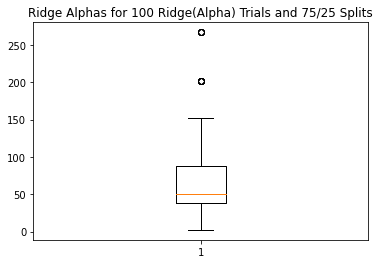

In [7]:
plt.boxplot(Ridge_Alphas)
plt.title('Ridge Alphas for 100 Ridge(Alpha) Trials and 75/25 Splits')
print("Median Alpha is: " + str(statistics.median(Ridge_Alphas)))
print("Mean Alpha is: " + str(statistics.mean(Ridge_Alphas)))
print("Standard Deviation Alpha is: " + str(statistics.stdev(Ridge_Alphas)))

In [8]:
print("Number of times results produced Negative R2: " + str((len(Negative))))

Number of times results produced Negative R2: 0


In [9]:
Negative

[]

In [10]:
df = pd.DataFrame(Positive, columns=['Ridge(Alpha)'])
df.to_csv('Ridge(Alpha)_Scores.csv', index=False)